In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
# pip install yfinance --upgrade --no-cache-dir <- 이거 bash terminal 에서 실행
from pandas import DataFrame

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

# 데이터 불러오기

In [28]:
estate=pd.read_csv("c:/Archiving/IMDGB/step02_ds_basic/dataset/seoul_real_estate.csv")
estate.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


# 데이터 타입 변환 (object to int)
- 사용자 정의 함수로 하려 한다.
- 곧바로 쓰지말고, 먼저 하나만 int로 바꾸는 함수를 써서 확인하고, 나오면 사용자 정의 함수로 선언하자

In [29]:
# 03/02 , 03/03 컬럼만 int 형으로 변경
# 데이터프레임 생성
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = pd.DataFrame(data=data, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


In [30]:
x = "1,000" # 애를 먼저 int로 바꿔보자
x.replace("," ,"") # 먼저 콤마를 지운다.

'1000'

In [31]:
int(x.replace(",","")) # 타입 변환, int로 변경된 것이 확인되면 사용자 정의 함수로 사용ㄱ

1000

In [32]:
# 사용자 정의 함수
def rm_comma(x):
    return int(x.replace(",",""))

# 사용자 정의 함수 잘 돌아가는 지 확인
y = "1,000"
print(rm_comma(y))

1000


In [33]:
df["03/02"] = df["03/02"].apply(rm_comma)
df["03/03"] = df["03/03"].apply(rm_comma)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [34]:
# sol2 / methods 활용
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = DataFrame(data=data, columns=columns) 
df2 = df.copy()
df2['03/02'] = df2['03/02'].str.replace(',', '').astype(int)
df2['03/03'] = df2['03/03'].str.replace(',', '').astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


# 데이터 시각화 1

In [35]:
sns.__version__ 

'0.13.2'

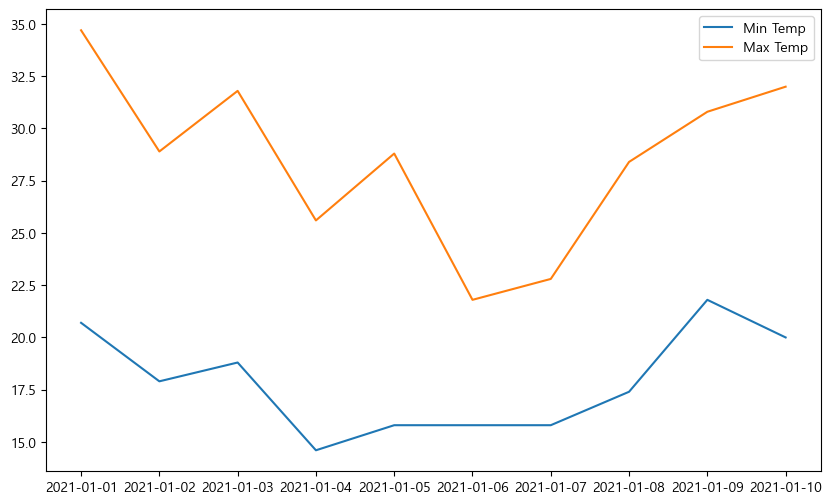

In [36]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
] 
# 지금 자료형이 list임. matpolitlib은 기본적으로 list를 받음. dataframe으로 작업하던 걸 list로 변환해야함. 
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 6))
ax.plot(dates, min_temperature, label = "Min Temp")
ax.plot(dates, max_temperature, label = "Max Temp")
ax.legend()
plt.show()

In [37]:
# Figure (차트사이즈)
# Axes (그래프 라인들 의미함 <- 이해 어렵)
print(fig)
print(ax)

Figure(1000x600)
Axes(0.125,0.11;0.775x0.77)


# 데이터 시각화 2 | Yahoo API에서 무료 주식 데이터 가져오기
- https://github.com/ranaroussi/yfinance

In [38]:
# import yfinance as yf

In [39]:
apple = yf.download("AAPL", start = "2020-01-01", end="2024-09-30")
nvidia = yf.download("NVDA", start = "2020-01-01", end="2024-09-30")
intel = yf.download("INTC", start="2020-01-01", end = "2024-09-30")
amazon = yf.download("AMZN", start="2020-01-01", end = "2024-09-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## matplotlib

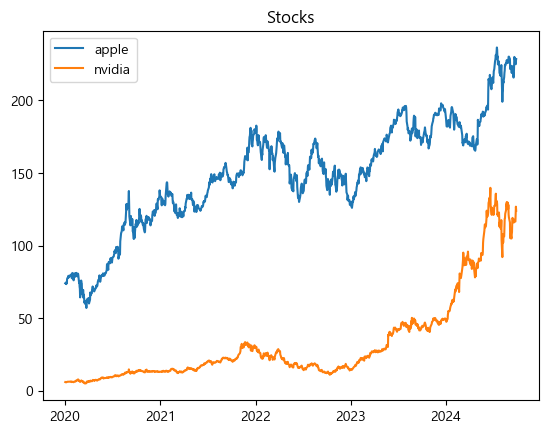

In [40]:
# 그래프 1
fig, ax = plt.subplots()
ax.plot(apple['Open'], label = 'apple')
ax.plot(nvidia['Open'], label = 'nvidia')
ax.set_title('Stocks')
ax.legend()
plt.show()

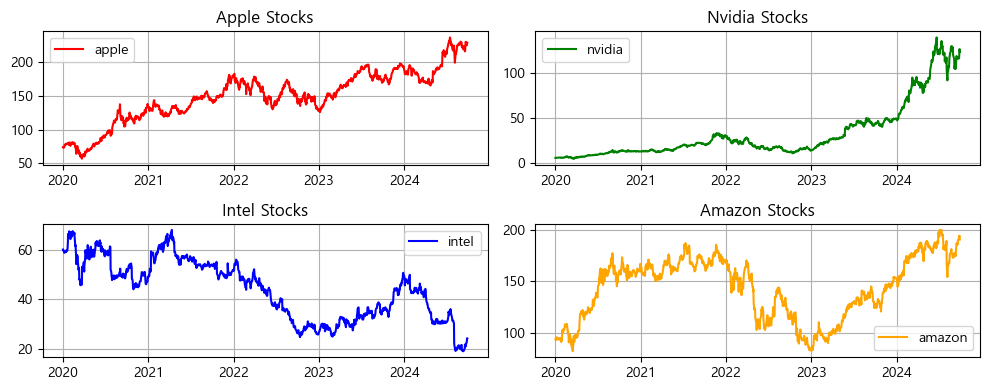

In [41]:
# 그래프 2

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
# nrows, ncols로 그래프 몇개 생성할 지


ax[0, 0].plot(apple['Open'], label = 'apple', color ='red')
ax[0, 1].plot(nvidia['Open'], label = 'nvidia' , color='green')
ax[1,0].plot(intel['Open'], label = 'intel', color ='blue')
ax[1, 1].plot(amazon['Open'], label = 'amazon' , color='orange')

ax[0, 0].set_title('Apple Stocks')
ax[0, 1].set_title('Nvidia Stocks')
ax[1, 0].set_title('Intel Stocks')
ax[1, 1].set_title('Amazon Stocks')

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

fig.tight_layout()

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()
plt.savefig('myStocks.png')
plt.show()

## seaborn

<Axes: xlabel='Date', ylabel='Open'>

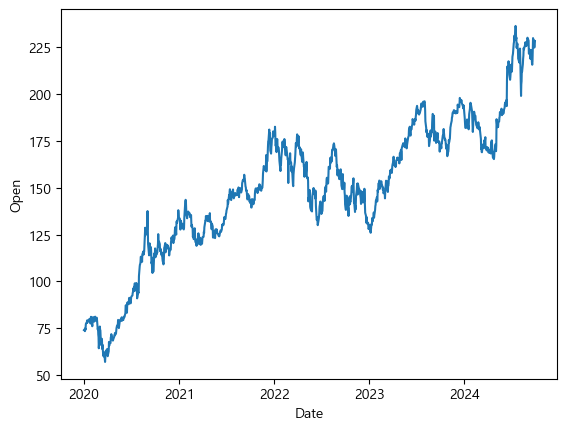

In [42]:
sns.lineplot(apple['Open'])

In [43]:
apple2=apple.reset_index()
apple2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400558,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


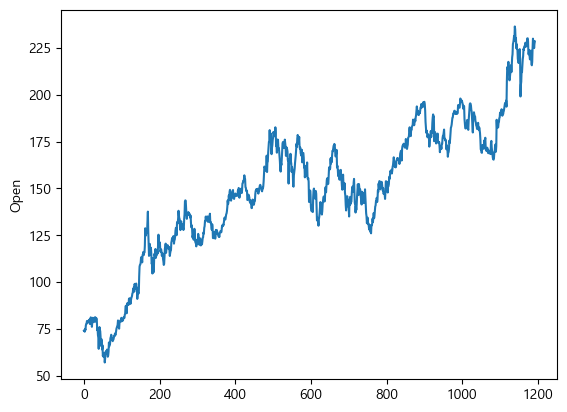

In [44]:
sns.lineplot(data=apple2['Open']) # 이렇게 하면 차트는 나오지만 날짜 안나옴
plt.show()

In [45]:
# 이렇게 하면 차트는 나오지만, 날짜는 안나옴

<Axes: xlabel='Date', ylabel='Open'>

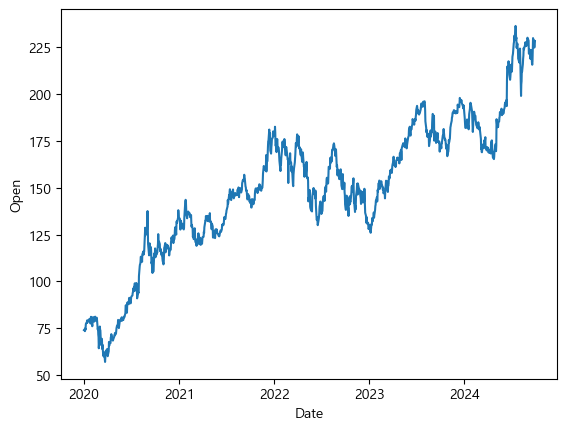

In [46]:
sns.lineplot(data = apple2, x='Date', y='Open')

## seaborn과 matplotlib 혼용
- method 안 매개변수에 ax 있으면 같이 쓸 수 있다.
- 보통 잘 쓰는 사람은 각 클래스의 장점만 같이 잘 씀

C:\Users\chaer\AppData\Local\Temp\ipykernel_13276\1986274685.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1, 1].legend()


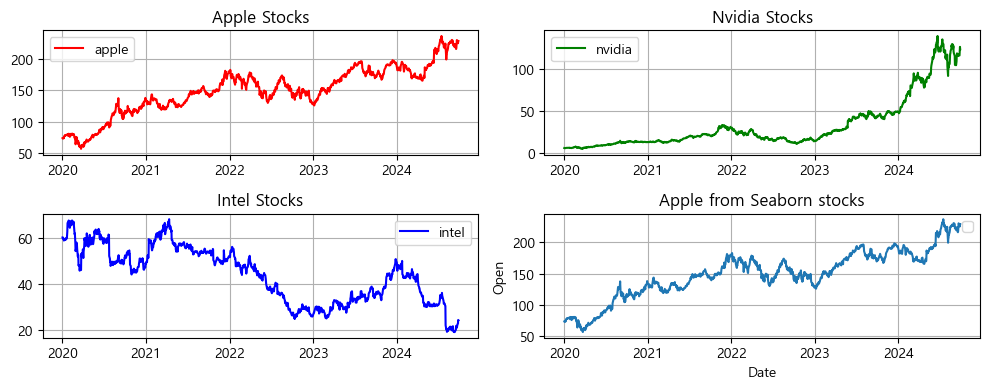

In [47]:
# 그래프 3
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,4))


ax[0, 0].plot(apple['Open'], label = 'apple', color ='red')
ax[0, 1].plot(nvidia['Open'], label = 'nvidia' , color='green')
ax[1,0].plot(intel['Open'], label = 'intel', color ='blue')
sns.lineplot(data = apple2, x='Date', y='Open', ax=ax[1,1])

ax[0, 0].set_title('Apple Stocks')
ax[0, 1].set_title('Nvidia Stocks')
ax[1, 0].set_title('Intel Stocks')
ax[1, 1].set_title('Apple from Seaborn stocks')

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

fig.tight_layout() # 간격주기

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()
plt.savefig('output/myStocks1.png')
plt.show()

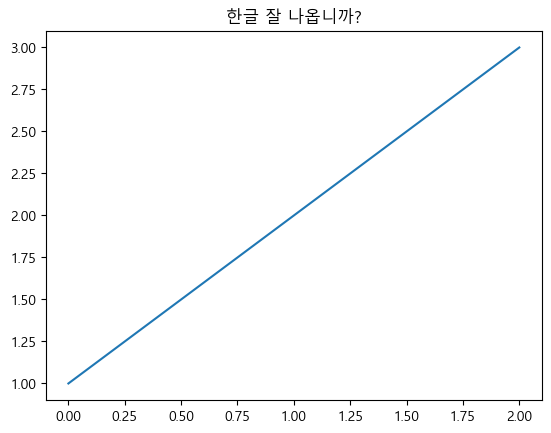

In [50]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# 연습문제
## 1) 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요. 

In [48]:
estate.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


### matplotlib

In [49]:
estate1=estate.copy()
estate1.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


In [53]:
sgg_counts = estate1['SGG_NM'].value_counts()
sgg_counts

SGG_NM
은평구     882
강서구     808
강동구     706
송파구     701
동대문구    550
구로구     513
노원구     511
양천구     502
강남구     489
마포구     458
성북구     456
영등포구    435
서초구     411
동작구     411
관악구     388
중랑구     374
강북구     352
서대문구    348
광진구     333
도봉구     331
성동구     289
금천구     266
용산구     176
중구      171
종로구     139
Name: count, dtype: int64

In [56]:
sgg_counts.index

Index(['은평구', '강서구', '강동구', '송파구', '동대문구', '구로구', '노원구', '양천구', '강남구', '마포구',
       '성북구', '영등포구', '서초구', '동작구', '관악구', '중랑구', '강북구', '서대문구', '광진구', '도봉구',
       '성동구', '금천구', '용산구', '중구', '종로구'],
      dtype='object', name='SGG_NM')

In [57]:
type(sgg_counts)

pandas.core.series.Series

In [58]:
# 보면 series임 . matplotlib은 list로 해야함.
# Series 객체는 파이썬 리스트와 달리 인덱싱 값을 지정할 수 있음
# list로 바꾸자

In [60]:
자치구 = list(sgg_counts.index)
건수 = list(sgg_counts.values)

print(자치구)
print(건수)

['은평구', '강서구', '강동구', '송파구', '동대문구', '구로구', '노원구', '양천구', '강남구', '마포구', '성북구', '영등포구', '서초구', '동작구', '관악구', '중랑구', '강북구', '서대문구', '광진구', '도봉구', '성동구', '금천구', '용산구', '중구', '종로구']
[np.int64(882), np.int64(808), np.int64(706), np.int64(701), np.int64(550), np.int64(513), np.int64(511), np.int64(502), np.int64(489), np.int64(458), np.int64(456), np.int64(435), np.int64(411), np.int64(411), np.int64(388), np.int64(374), np.int64(352), np.int64(348), np.int64(333), np.int64(331), np.int64(289), np.int64(266), np.int64(176), np.int64(171), np.int64(139)]


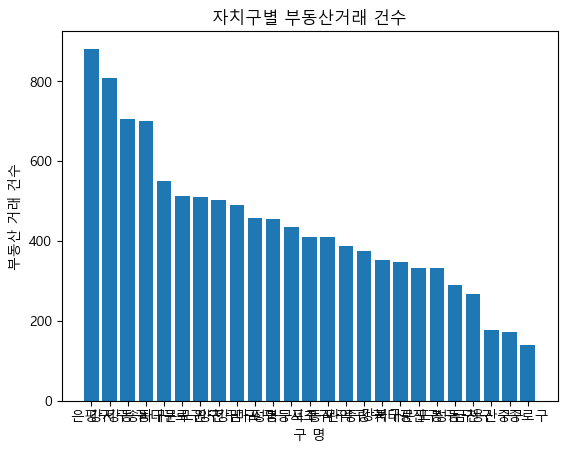

In [65]:
# sol1

# 데이터 가공 <- 여기가 변하는 거임. 
sgg_counts=estate1['SGG_NM'].value_counts()
자치구 = list(sgg_counts.index)
건수 = list(sgg_counts.values)

# 시각화
fig, ax = plt.subplots()
ax.bar(자치구, 건수)
ax.set_xlabel('구 명')
ax.set_ylabel('부동산 거래 건수')
ax.set_title('자치구별 부동산거래 건수')

plt.show()

### seaborn

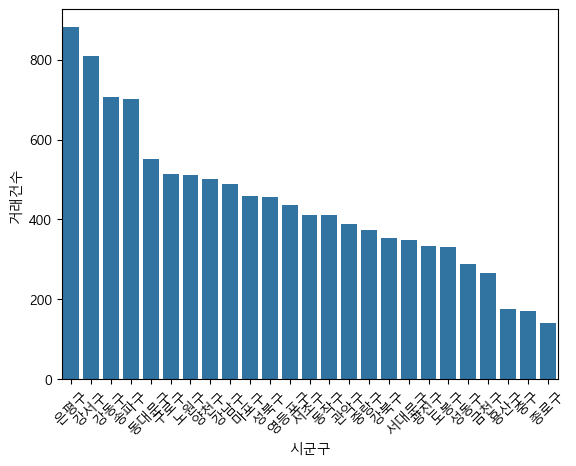

In [89]:
# 강사님
# 이렇게 하는게 , 데이터 깔끔하기 때문에 이렇게 하는 게 좋다.

sgg_count = estate['SGG_NM'].value_counts().reset_index()
# index가 0,1,2,로 되어있는 상태가 dataframe임. sns 에서는 dataframe으로 해야한다.
sgg_count.columns=['시군구','거래건수']

fig, ax=plt.subplots()
sns.barplot(sgg_count, x="시군구", y="거래건수")
plt.xticks(rotation=45)
plt.show()

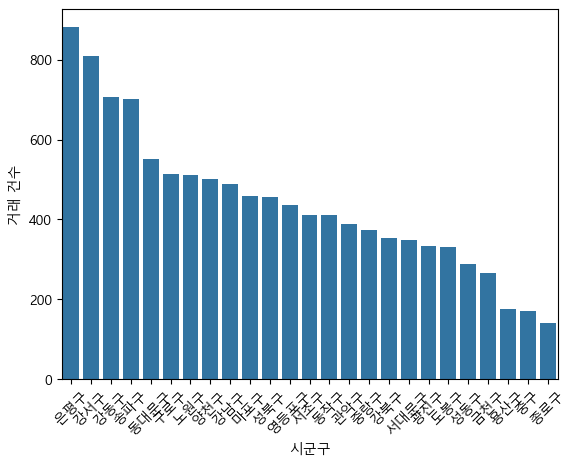

In [91]:
# 나 
count_df=estate['SGG_NM'].value_counts()
count_df_df=DataFrame(count_df)

fig, ax=plt.subplots()
sns.barplot(count_df_df, x="SGG_NM", y="count")
plt.xticks(rotation=45)
ax.set_xlabel('시군구')
ax.set_ylabel('거래 건수')

plt.show()

## 2) 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatter

### matplotlib

In [66]:
estate1.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


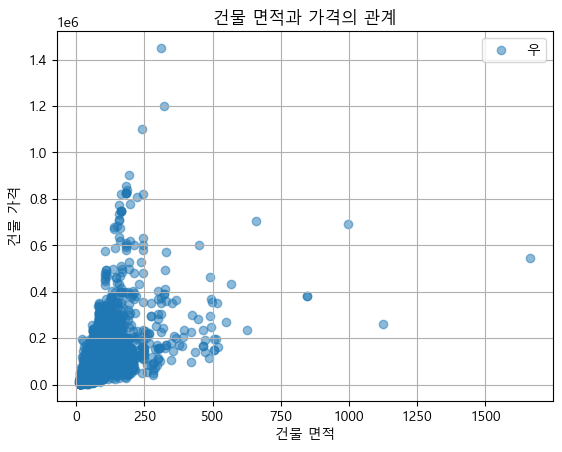

In [75]:
# sol 1

# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)

# 데이터 가공 <- 여기가 변하는 거임. 
x=estate1['BLDG_AREA']
y=estate1['OBJ_AMT']
# 시각화
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)

ax.set_xlabel('건물 면적')
ax.set_ylabel('건물 가격')
ax.set_title('건물 면적과 가격의 관계')
ax.legend('우ㅏ아아')
ax.grid(True)

plt.show()

#### 대조, 강조할 색 표시

In [76]:
estate1[estate1['BLDG_AREA'] >= 900]

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
2796,2023,11620,관악구,10200,신림동,NaN,NaN,NaN,NaN,NaN,...,260000,1125.97,261.0,0.0,NaN,NaN,1998.0,단독다가구,중개거래,"서울 강북구, 서울 관악구"
4331,2023,11650,서초구,10100,방배동,NaN,NaN,NaN,NaN,NaN,...,690000,994.89,313.5,0.0,NaN,NaN,1992.0,단독다가구,중개거래,서울 서초구
10451,2023,11350,노원구,10500,상계동,NaN,NaN,NaN,NaN,NaN,...,545000,1664.83,329.0,0.0,NaN,NaN,2001.0,단독다가구,직거래,NaN


In [79]:
type(estate1)

pandas.core.frame.DataFrame

In [80]:
type(estate['BLDG_AREA'])

pandas.core.series.Series

In [81]:
type(estate1['BLDG_AREA'] >= 900)

pandas.core.series.Series

In [82]:
type(highest_values)

pandas.core.frame.DataFrame

In [85]:
highest_values = estate1['BLDG_AREA'] >= 900
highest_values

0        False
1        False
2        False
3        False
4        False
         ...  
10995    False
10996    False
10997    False
10998    False
10999    False
Name: BLDG_AREA, Length: 11000, dtype: bool

In [86]:
estate1['BLDG_AREA'][highest_values]

2796     1125.97
4331      994.89
10451    1664.83
Name: BLDG_AREA, dtype: float64

In [87]:
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

(2796     1125.97
 4331      994.89
 10451    1664.83
 Name: BLDG_AREA, dtype: float64,
 2796     260000
 4331     690000
 10451    545000
 Name: OBJ_AMT, dtype: int64)

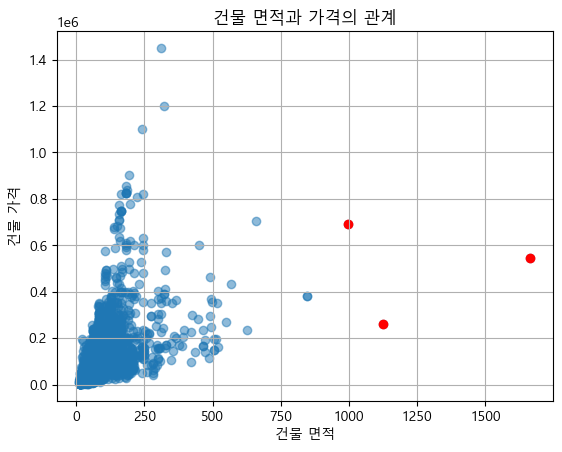

In [88]:
# 시각화

fig, ax = plt.subplots()
ax.scatter(estate['BLDG_AREA'], estate['OBJ_AMT'], alpha=0.5)
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color = 'red')

ax.set_xlabel('건물 면적')
ax.set_ylabel('건물 가격')
ax.set_title('건물 면적과 가격의 관계')
ax.grid(True)

plt.show()

### seaborn

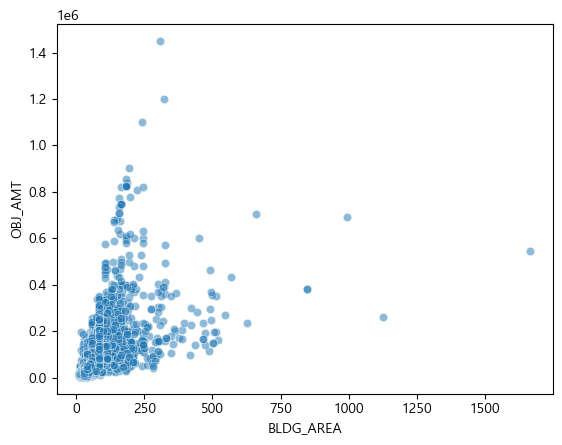

In [92]:
# 강사님
fig, ax = plt.subplots()
sns.scatterplot(data = estate, x = 'BLDG_AREA', y='OBJ_AMT', alpha=0.5)
plt.show()

#### 대조 강조 색 표시
- 이렇게 seaborn이랑 matplotlib 같이 쓴다

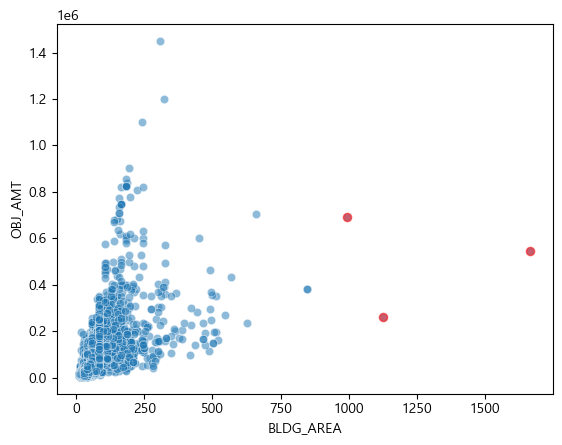

In [98]:
# 색변경
estate.loc[estate['BLDG_AREA'] >= 900, :]
highest_values = estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

fig, ax = plt.subplots()
# seaborn library
sns.scatterplot(data = estate, x = 'BLDG_AREA', y = 'OBJ_AMT', alpha = 0.5)

# matplotlib library
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], alpha=0.5, color = 'red')
plt.show()

# matplotlib 옵션 설정

In [99]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FuncFormatter
# https://matplotlib.org/stable/api/ticker_api.html

In [100]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


여기 확인 필요: Rectangle(xy=(-0.4, 0), width=0.8, height=17.6827, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 17.682741935483868 너비 0.8
여기 확인 필요: Rectangle(xy=(0.6, 0), width=0.8, height=17.1516, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 17.15157894736842 너비 0.7999999999999999
여기 확인 필요: Rectangle(xy=(1.6, 0), width=0.8, height=20.4414, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 20.441379310344825 너비 0.7999999999999998
여기 확인 필요: Rectangle(xy=(2.6, 0), width=0.8, height=21.41, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 21.41 너비 0.7999999999999998


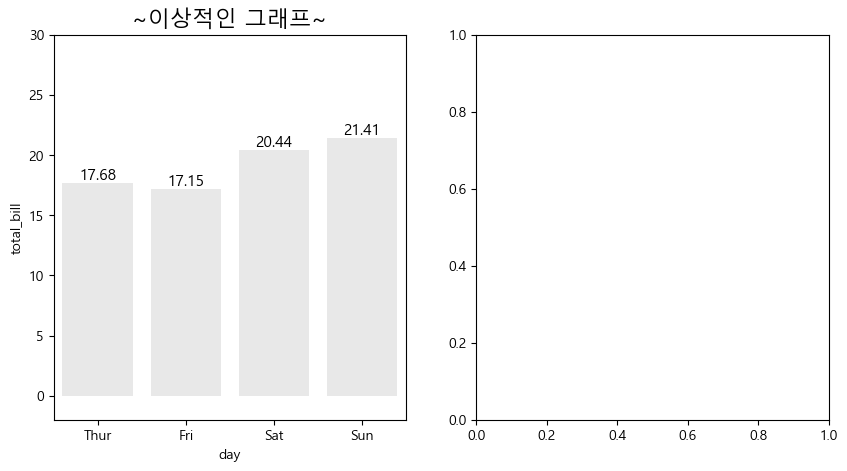

In [102]:
# 객체 지향 선언
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.barplot(data=tips, 
            x="day", 
            y="total_bill", 
            errorbar=None,
            color='lightgray', 
            alpha=0.5,
            zorder=5,
            ax = ax[0] ) # 나중에 zorder 설명해주신다고 함
            # matplotlib이랑 연동해서 쓰고 싶으면, 매개변수에 ax 있늕 ㅣ보면 됨. sns.catplot의 경우 매개변수 ax 없음. 그래서 matplotlib이랑 같이 못씀


# 텍스트 올리기
for p in ax[0].patches:
  print("여기 확인 필요:", p, type(p)) 
  # 저 막대 하나하나가 각각 인스턴스
  # 개별적으로 텍스트 올리기 위해서 반복문 쓴 거임. 뭔소리야
  #https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
  print("높이", p.get_height(), "너비", p.get_width())
  # 이거 이해 안되면 우주선 클래스 다시 봐야함.. ㅇㅇ 보세요
  height = np. round(p.get_height(), 2) # round : 반올림, np.round( , 2) : 반올림해서 소수 둘째자리까지 나타내기
  ax[0].text(p.get_x() + p.get_width()/2, height + 0.3, height, ha= 'center', size=11 ) 
  # p.get_x() + p.get_width()/2 : 텍스트 올리려하는데 그 좌표 중 x 축 위치. 시작점=p.get_x()=막대 젤 왼쪽 좌표
  # height + 0.3 : y축 위치 지정 -y축 간격 보고 지정
  # height : 내가 표시 할 값 <- 위에 for p ~ type(p)) 까지로 구한거임
  # ha = 'center' : 
  # size : 폰트 사이즈

# 옵션
ax[0].set_title("~이상적인 그래프~", size=16)
ax[0].set_ylim(-2, 30) # 표 안에 값 다 들어오도록 y축 설정한 것
plt.show()

## 대조 강조 색표시

In [103]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)
# 서식 함수 만든 것

In [104]:
# 대조 색 넣으려고 하는 거
group_mean = tips.groupby(['day'])['total_bill'].agg("mean")
# group_mean을 사용해보자
# 아래 조건문을 사용해서, 조건에 맞으면 색 변경되도록 할 것임
h_day=group_mean.sort_values(ascending=False).index[0] # index를 내림차순으로 정렬 하고 맨 첫 값 가져온 것
h_mean=np.round(group_mean.sort_values(ascending=False)[0],2)
h_day,h_mean

C:\Users\chaer\AppData\Local\Temp\ipykernel_13276\1061004422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg("mean")
C:\Users\chaer\AppData\Local\Temp\ipykernel_13276\1061004422.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_mean=np.round(group_mean.sort_values(ascending=False)[0],2)


('Sun', np.float64(21.41))

여기 확인 필요: Rectangle(xy=(-0.4, 0), width=0.8, height=17.6827, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 17.682741935483868 너비 0.8
여기 확인 필요: Rectangle(xy=(0.6, 0), width=0.8, height=17.1516, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 17.15157894736842 너비 0.7999999999999999
여기 확인 필요: Rectangle(xy=(1.6, 0), width=0.8, height=20.4414, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 20.441379310344825 너비 0.7999999999999998
여기 확인 필요: Rectangle(xy=(2.6, 0), width=0.8, height=21.41, angle=0) <class 'matplotlib.patches.Rectangle'>
높이 21.41 너비 0.7999999999999998
높이 17.682741935483868 너비 0.8
높이 17.15157894736842 너비 0.7999999999999999
높이 20.441379310344825 너비 0.7999999999999998
높이 21.41 너비 0.7999999999999998


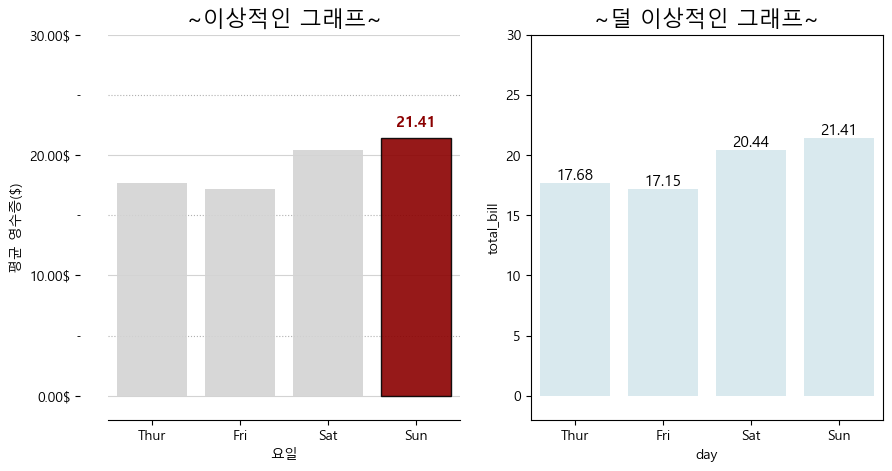

In [105]:

# 객체 지향 선언
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.barplot(data=tips, 
            x="day", 
            y="total_bill", 
            errorbar=None,
            color='lightgray', 
            alpha=0.9,
            zorder=2,
            ax = ax[0] ) # zorder=1이면 그래프 앞으로 grid 지나가고, 2면 차트 뒤로 감
            # matplotlib이랑 연동해서 쓰고 싶으면, 매개변수에 ax 있늕 ㅣ보면 됨. sns.catplot의 경우 매개변수 ax 없음. 그래서 matplotlib이랑 같이 못씀


# 텍스트 올리기
for p in ax[0].patches:
  print("여기 확인 필요:", p, type(p)) 
  # 저 막대 하나하나가 각각 인스턴스
  # 개별적으로 텍스트 올리기 위해서 반복문 쓴 거임. 뭔소리야
  #https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
  print("높이", p.get_height(), "너비", p.get_width())
  # 이거 이해 안되면 우주선 클래스 다시 봐야함.. ㅇㅇ 보세요
  height = np. round(p.get_height(), 2) # round : 반올림, np.round( , 2) : 반올림해서 소수 둘째자리까지 나타내기
  # 여기서부터 한단락이 대조 위한 색 
  fontweight='normal'
  color = 'k'
  if h_mean == height:
    fontweight = 'bold'
    color = 'darkred'
    p.set_facecolor(color)
    p.set_edgecolor('black')
 
 
    ax[0].text(p.get_x() + p.get_width()/2, 
               height + 1, 
               height, 
               ha= 'center', size=11,
               fontweight = 'bold', color = 'darkred') 
  # p.get_x() + p.get_width()/2 : 텍스트 올리려하는데 그 좌표 중 x 축 위치. 시작점=p.get_x()=막대 젤 왼쪽 좌표
  # height + 0.3 : y축 위치 지정 -y축 간격 보고 지정
  # height : 내가 표시 할 값 <- 위에 for p ~ type(p)) 까지로 구한거임
  # ha = 'center' : 
  # size : 폰트 사이즈

# 옵션
ax[0].set_title("~이상적인 그래프~", size=16)
ax[0].set_ylim(-2, 30) # 표 안에 값 다 들어오도록 y축 설정

# spines 항목 정리
ax[0].spines['top'].set_visible(False) # 박스 줄 없애기
# https://matplotlib.org/stable/api/spines_api.html
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
#ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_position(("outward",20))

# y축 정리
ax[0].yaxis.set_major_locator(MultipleLocator(10)) # 큰 눈금은 10 간격으로
ax[0].yaxis.set_major_formatter(formatter) # 20.00$ 방식으로 출력
ax[0].yaxis.set_minor_locator(MultipleLocator(5))

# 축 라벨 지정
ax[0].set_ylabel("평균 영수증($)",fontsize=10)
ax[0].set_xlabel("요일",fontsize=10)

#그리드
ax[0].grid(axis='y', which='major',color='lightgray')
ax[0].grid(axis='y', which='minor',ls=':')

# 시각화 할 때는 대조를 어떻게 시킬 것인가..를 제일 고민해야함
# https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/
# https://jehyunlee.github.io/2023/01/01/Python-DS-125-rpa/



# 오른쪽 그래프
sns.barplot(data=tips, 
            x="day", 
            y="total_bill", 
            errorbar=None,
            color='lightblue', 
            alpha=0.5,
            zorder=5,
            ax = ax[1] )

for p in ax[1].patches:
#  print("여기 확인 필요:", p, type(p)) 
  print("높이", p.get_height(), "너비", p.get_width())
  height = np. round(p.get_height(), 2)
  ax[1].text(p.get_x() + p.get_width()/2, height + 0.3, height, ha= 'center', size=11 ) 


# 옵션
ax[1].set_title("~덜 이상적인 그래프~", size=16)
ax[1].set_ylim(-2, 30) # 표 안에 값 다 들어오도록 y축 설정


plt.show()